In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import DataSplitter

In [125]:
df60 = DataSplitter.getTrainData(60)

target_column = "diff"
drop_cols = ["date", "hour", "year", "quarter", "Q1", "month", "monthNumber", "weekNumber", "weekDay", "dateNumber", "mon", "workdayPlan", "line", "passengersBoarding", "datetime", "eventName"]

train60, val60 = DataSplitter.performTrainValSplit(df60)
train60_1A = train60[train60["line"] == "1A"]
val60_1A = val60[val60["line"] == "1A"]

X_train = train60_1A.drop(columns=([target_column] + drop_cols), axis=1).reset_index(drop=True)
X_val = val60_1A.drop(columns=([target_column] + drop_cols), axis=1).reset_index(drop=True)
y_train = train60_1A[target_column].reset_index(drop=True)
y_val = val60_1A[target_column].reset_index(drop=True)

In [126]:
# Step 4: Scale the features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 5: Apply Lasso regression
alpha_value = 0.1  # Adjust this parameter based on your needs
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

# Check the coefficients of the model
coefficients = lasso_model.coef_
print('Coefficients:', coefficients)

# Identify the features with non-zero coefficients
selected_features = X_train.columns[coefficients != 0]
print('Selected Features:', selected_features)

print("Number of coefficients:", len(coefficients))
print("Number of selected features:", len(selected_features))

# Use statsmodels to perform OLS regression
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Display the summary statistics
print(ols_model.summary())

Mean Squared Error: 4353.395670741857
Coefficients: [ 1.68215287e+01  5.41337610e-01 -1.09215076e-01 -1.41078116e-01
 -1.07053585e+01 -1.24305449e+01 -1.22662127e+01 -8.13557711e+00
 -5.97430316e+00 -5.77643898e+00 -1.13532125e+01 -1.22926154e+01
 -2.49852261e-01 -0.00000000e+00  1.38550827e+00 -1.08701877e-01
  1.18565701e+00  2.09668026e+00  9.99619076e-01  0.00000000e+00
  3.21949297e-01  4.62208161e-02 -4.16043666e-01  4.72047605e-01
  1.44688289e-01  2.22952456e+00 -3.51756796e+01 -3.29750016e+01
 -4.27644072e+01 -3.45841797e+01 -3.10606269e+01 -3.15401710e+01
 -2.53431254e+01 -2.81657428e+01 -2.41022193e+01 -3.34963664e+01
 -2.84250325e+01 -2.99893486e+01 -3.34512277e+01 -3.22680647e+01
 -3.19294264e+01 -2.78645758e+01 -2.57916373e+01 -2.65306553e+01
 -1.90852654e+01  2.50772984e+01 -4.38873641e+00  4.42197711e+00
  2.29451497e+00 -4.50648542e+00  2.44991683e+01  6.83389578e+01]
Selected Features: Index(['peakHour', 'Q2', 'Q3', 'Q4', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',
    

MSE: 4353.395670741857


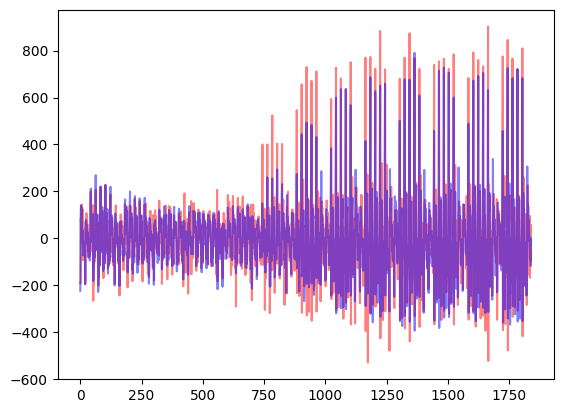

In [127]:
import matplotlib.pyplot as plt

plt.plot(y_val, color="red", alpha=0.5)
plt.plot(y_pred, color="blue", alpha=0.5)
print("MSE:", mse)